In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [3]:
df = pd.read_csv("data/data_merge.csv")

In [4]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [6]:
# std = StandardScaler()
# ohe= OneHotEncoder(sparse_output=False)

# log_1p = FunctionTransformer(func=np.log1p)
# preprocessor_pca = ColumnTransformer(
#     transformers=[
#         ("ohe",ohe,cat_columns),
#         ("log",log_1p,num_columns)
#     ]
    
# )
# tsne=Pipeline([
#      ('preprocessor', preprocessor_pca),
#      ('std', std ),
#      ("tsne", TSNE(n_components=3,random_state=42,verbose=2,n_jobs=-1))
# ])

# tsne_value = tsne.fit_transform(df)

C:\Users\cduro\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cduro\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cduro\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cduro\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

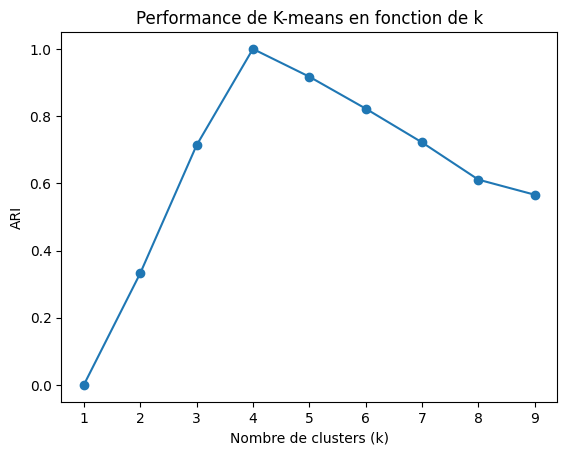

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Générer un ensemble de données avec 4 clusters
X, y_true = make_blobs(n_samples=500, centers=4, random_state=42)

# Calculer l'ARI pour différentes valeurs de k
ari_scores = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    ari = adjusted_rand_score(y_true, y_pred)
    ari_scores.append(ari)

# Afficher le graphique de l'ARI
plt.plot(k_values, ari_scores, '-o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('ARI')
plt.title('Performance de K-means en fonction de k')
plt.show()

In [8]:
# import pickle
# pickle_out = open("tsne.pkl", "wb") 
# pickle.dump(tsne_value, pickle_out) 
# pickle_out.close()

In [9]:
import pickle
pickle_in = open("tsne.pkl", "rb") 
tsne_value = pickle.load(pickle_in) 
pickle_in.close()

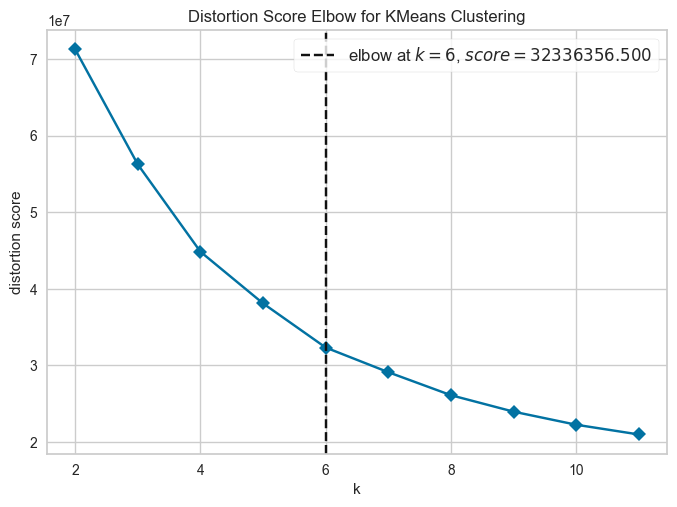

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10,random_state=42),metric="distortion", k=(2,12),timings=False)

visualizer.fit(tsne_value)        # Fit the data to the visualizer
visualizer.show()                 # Finalize and render the figure

In [11]:
kmeans = KMeans(n_clusters=6,n_init=10,random_state=42)
kmeans.fit(tsne_value)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [12]:
df["label"]=kmeans.labels_

In [13]:
df

nb_items_total  montant_total  nb_commande payment_type_most_frequent  \
0                 1.0         141.90            1                credit_card   
1                 1.0          27.19            1                credit_card   
2                 1.0          86.22            1                credit_card   
3                 1.0          43.62            1                credit_card   
4                 1.0         196.89            1                credit_card   
...               ...            ...          ...                        ...   
92896             2.0        2067.42            1                credit_card   
92897             1.0          84.58            1                credit_card   
92898             1.0         112.46            1                credit_card   
92899             1.0         133.69            1                credit_card   
92900             1.0          71.56            1                credit_card   

      most_frequent_product_category  mean_review_score  \
0                          Furniture                5.0   
1                  Health_and_Beauty                4.0   
2                      Miscellaneous                3.0   
3                      Communication                4.0   
4                      Communication                5.0   
...                              ...                ...   
92896              Health_and_Beauty                5.0   
92897                           Baby                4.0   
92898                     Automotive                5.0   
92899                     Well-being                5.0   
92900              Health_and_Beauty                5.0   

       mean_payment_installments  mean_length_comment_title  \
0                            8.0                       15.0   
1                            1.0                        0.0   
2                            8.0                        0.0   
3                            4.0                        0.0   
4                            6.0                        0.0   
...                          ...                        ...   
92896                       10.0                        0.0   
92897                        1.0                        0.0   
92898                        1.0                        0.0   
92899                        5.0                        8.0   
92900                        4.0                        0.0   

       mean_length_comment_message  mean_distance  recence  \
0                            111.0       1.047809    165.0   
1                              0.0       0.215858    168.0   
2                              0.0       4.718337    591.0   
3                             12.0      22.323718    375.0   
4                              0.0       1.511395    342.0   
...                            ...            ...      ...   
92896                          0.0      18.181014    501.0   
92897                          0.0      14.007418    316.0   
92898                          0.0      14.092158    622.0   
92899                        133.0       6.149897    173.0   
92900                          0.0       3.432792    538.0   

       med_product_photos_qty  med_product_description_lenght  label  
0                         1.0                           236.0      5  
1                         1.0                           635.0      5  
2                         3.0                           177.0      2  
3                         5.0                          1741.0      2  
4                         3.0                           794.0      2  
...                       ...                             ...    ...  
92896                     1.0                           423.0      4  
92897                     2.0                           506.0      5  
92898                     5.0                           716.0      3  
92899                     3.0                           591.0      3  
92900                     2.0                         

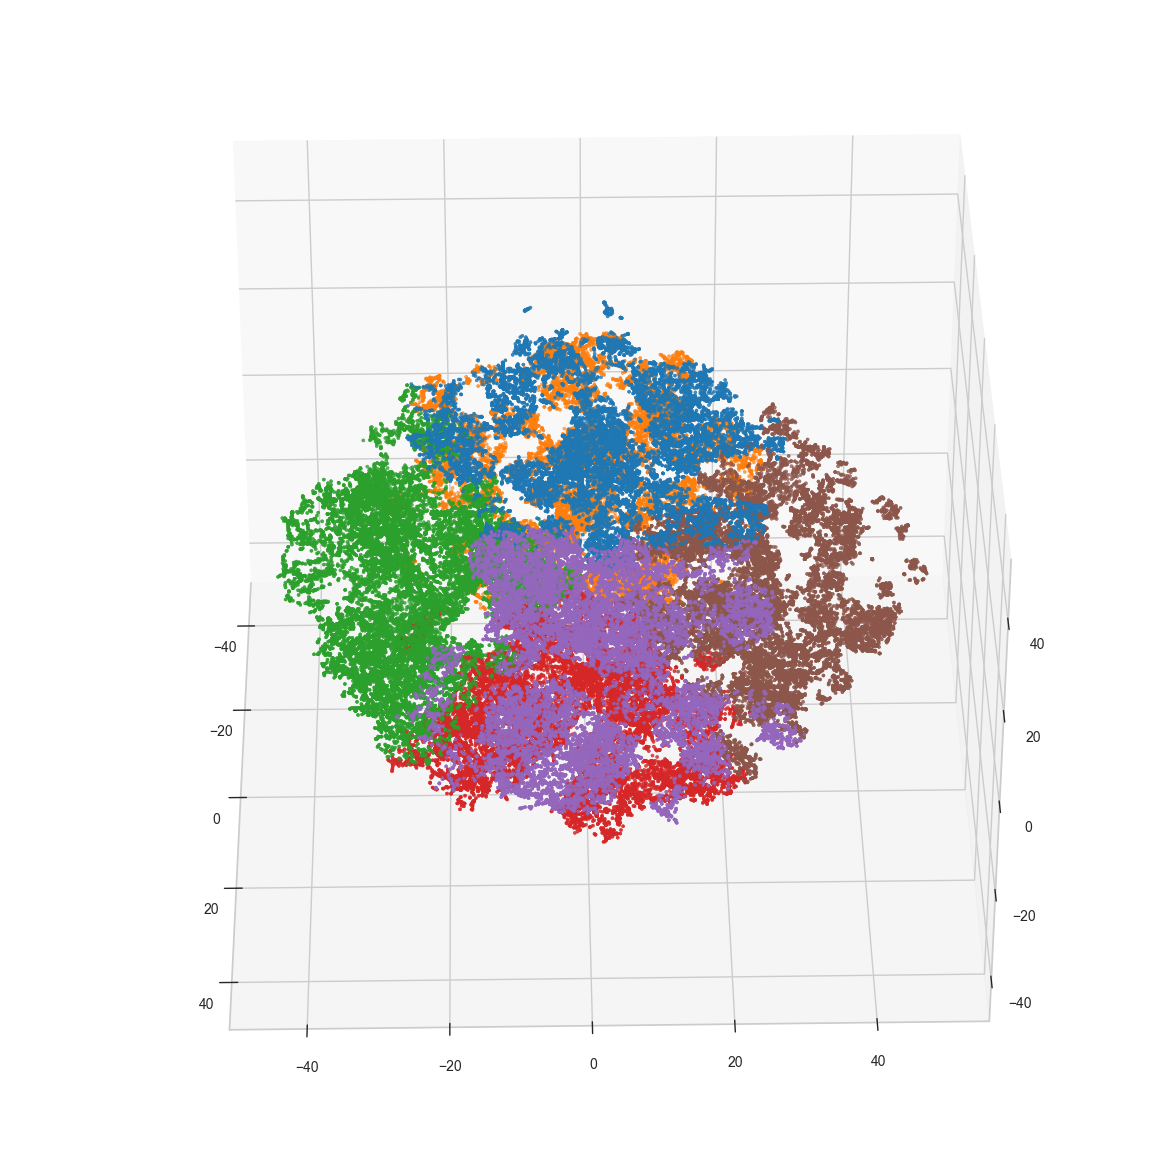

In [14]:
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create figure and axes
fig = plt.figure()
fig.set_size_inches(25, 15)
ax = fig.add_subplot(111, projection='3d')

# Creation d'une liste de couleurs pour une meilleure lecture des clusters
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}

def init():
    ax.scatter3D(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df["label"]])
    return fig,

def animate(i):
    ax.view_init(elev=i/10., azim=i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=100, blit=False)

metadata = dict(title='Scatter3D_Video', artist='Matplotlib', comment='')
writer = animation.FFMpegWriter(fps=25, metadata=metadata, bitrate=3500)
ani.save('scatter3D_animation.mp4', writer=writer)

import io
import base64
from IPython.display import HTML

video = io.open('scatter3D_animation.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>

<source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))

In [ ]:
stop here

import io
import base64
from IPython.display import HTML

video = io.open('scatter3D_animation.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>

<source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))

In [15]:
# Generating random data 
data = np.random.rand(100)+np.random.randint(100)

# Initializing KMeans 
kmeans = KMeans(2) 

# Fitting with inputs 
kmeans = kmeans.fit(data.reshape(-1,1)) 

# Predicting the clusters 
labels = kmeans.predict(data.reshape(-1,1)) 

# Getting the cluster centers 
C = kmeans.cluster_centers_ 

#Calculating the Adjusted Rand Score
score = adjusted_rand_score(data, labels) 

print("ARI score: ", score)

ARI score:  0.0


C:\Users\cduro\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cduro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf'}


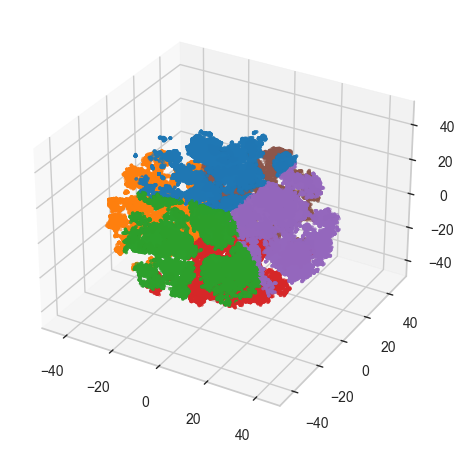

In [16]:
%matplotlib inline
import matplotlib.colors as mcolors
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Créer une liste de couleurs à partir de la palette "Set1" de Matplotlib
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Créer un dictionnaire pour mapper des couleurs aux valeurs de la liste
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}
print(color_dict)

ax.scatter(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df["label"]])
plt.show()

In [17]:
result = df.groupby(['label']).mean()
result

C:\Users\cduro\AppData\Local\Temp\ipykernel_24036\825856455.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby(['label']).mean()


nb_items_total  montant_total  nb_commande  mean_review_score  \
label                                                                  
0            1.194525     151.215707     1.020810           3.857055   
1            1.158989     141.990322     1.004354           3.907034   
2            1.057035     153.244754     1.000000           4.389464   
3            1.048536     153.697305     1.002759           4.430008   
4            1.199059     187.299651     1.000000           4.017189   
5            1.441886     201.088796     1.173003           4.057594   

       mean_payment_installments  mean_length_comment_title  \
label                                                         
0                       2.790698                   1.363330   
1                       1.208567                   1.541538   
2                       3.067548                   0.437454   
3                       2.999248                   1.471729   
4                       4.070201                   0.553199   
5                       3.136163                   2.934798   

       mean_length_comment_message  mean_distance     recence  \
label                                                           
0                        42.750576       5.374977  312.669650   
1                        33.655676       5.730762  297.685744   
2                        14.030072       5.543779  294.425244   
3                        17.154407       5.894908  280.086787   
4                        25.118632       5.601638  320.387453   
5                        34.994341       5.362999  254.068831   

       med_product_photos_qty  med_product_description_lenght  
label                                                          
0                    2.127620                      567.599053  
1                    2.315379                      823.007022  
2                    2.154938                      742.547001  
3                    2.415470                      911.930614  
4                    2.274404                      742.160602  
5                    2.024560                      892.571511

In [18]:
import plotly.graph_objects as go

categories = result.columns
fig = go.Figure()

for g in result.index:
    fig.add_trace(go.Scatterpolar(
        r = result.loc[g].values,
        theta = categories,
        fill = 'toself',
        name = f'cluster #{g}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5] # here we can define the range
    )),
  showlegend=True,
    title="Issues with Plotly",
    title_x=0.5
)

fig.show()

In [19]:
test

NameError: name 'test' is not defined

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)